In [53]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from rdkit import Chem
from dft_descriptors import prepocessing as pp
from dft_descriptors import numbering_CO as nb

In [54]:
df = pd.read_csv('../data_csv/Data_test11032021.csv', sep = ',')
df = pp.preprocess(df)
dft_ax = pd.read_csv('../data_csv/AX_dft.csv')
dft_lig = pd.read_csv('../data_csv/ligand_dft.csv')
dft_oc = pd.read_csv('../data_csv/substrate_dft.csv')

In [55]:
#df["Reactant Smile (C-O)"].unique()

In [56]:
dft_ax["rdkit_can"]  = [Chem.CanonSmiles(smi) for smi in dft_ax["Unnamed: 0"]]
rdkit_lig = ["nan"]
for smi in dft_lig["Unnamed: 0"][1:]:
    rdkit_lig.append(Chem.CanonSmiles(smi))
dft_lig["rdkit_can"] =  rdkit_lig#["nan"].append(Chem.CanonSmiles(smi) for smi in dft_lig["Unnamed: 0"][1:])
dft_oc["rdkit_can"]  = [Chem.CanonSmiles(smi) for smi in dft_oc["Unnamed: 0"]]

In [57]:
canon_oc = np.unique(df["Reactant Smile (C-O)"])
canon_ax = np.unique(df["A-X effectif"])
sub_df = df.dropna(subset=["Ligand effectif"])

In [58]:
smi_ligs = list(sub_df["Ligand effectif"].unique())
smi_ligs.remove('NoLigand')
canon_lig = np.unique([Chem.CanonSmiles(smi) for smi in smi_ligs[1:]])

1


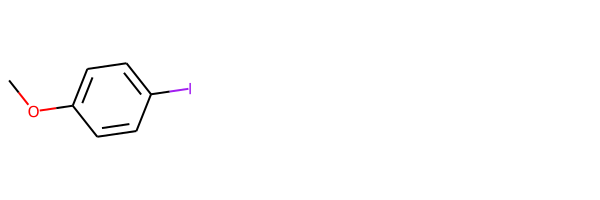

In [59]:
missing_oc = []
mols_oc = []
for smi in canon_oc:
    if smi not in list(dft_oc["rdkit_can"]):
        missing_oc.append(smi)
        mols_oc.append(Chem.MolFromSmiles(smi))

print(len(missing_oc))
Chem.Draw.MolsToGridImage(mols_oc)

In [60]:
missing_oc

['COc1ccc(I)cc1']

In [61]:
missing_lig = []
mols_lig = []
for smi in canon_lig:
    if Chem.CanonSmiles(smi) not in list(dft_lig["rdkit_can"]):
        missing_lig.append(smi)
        mols_lig.append(Chem.MolFromSmiles(smi))
missing_lig

['[C]1N(C23CC4CC(CC(C4)C2)C3)C=CN1C12CC3CC(CC(C3)C1)C2']

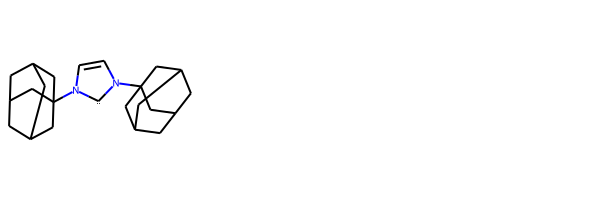

In [62]:
Chem.Draw.MolsToGridImage(mols_lig)

In [63]:
missing = len(canon_lig) - len(dft_lig)
print(len(missing_lig))

1


In [64]:
missing_ax = []
mols_ax = []
for smi in canon_ax:
    if smi not in list(dft_ax["rdkit_can"]):
        print(smi)
        missing_ax.append(smi)
        mols_ax.append(Chem.MolFromSmiles(smi))

[Li][Zn]([Li])(C)(C)(C)c1ccc(C(=O)N(C(C)C)C(C)C)cc1
[Na+].c1ccc([B-](c2ccccc2)(c2ccccc2)c2ccccc2)cc1


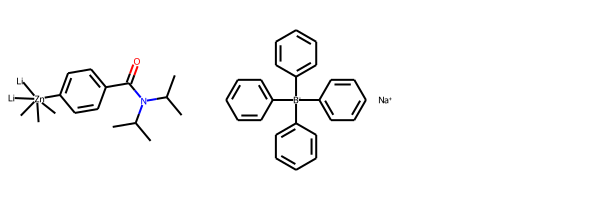

In [65]:
Chem.Draw.MolsToGridImage(mols_ax)

In [14]:
missing_ax

['CCCCc1ccc(B2OB(c3ccc(CCCC)cc3)OB(c3ccc(CCCC)cc3)O2)cc1',
 'Cc1cc(C)c([Mg]Br)c(C)c1',
 'Cc1ccc([Mg]I)cc1',
 '[Li][Zn]([Li])(C)(C)(C)c1ccc(C(=O)N(C(C)C)C(C)C)cc1',
 '[Na+].c1ccc([B-](c2ccccc2)(c2ccccc2)c2ccccc2)cc1']

In [15]:
missing = len(canon_ax) - len(dft_ax)
print(len(missing_ax))

5


In [30]:
df_all = pd.read_csv("../data_csv/Data_test11032021.csv")
df_all = pp.preprocess(df_all)
print(len(df_all["Reactant Smile (C-O)"].unique()))
print(len(np.unique(dft_oc["rdkit_can"])))
print(len(pd.read_csv("../data_csv/fragments_0-7.csv")))
print(len(df_all["A-X effectif"].unique()))
print(len(np.unique(dft_ax["rdkit_can"])))
print(len(pd.read_csv("../data_csv/num_AX.csv")))
print(len(df_all["Ligand effectif"].unique()))
print(len(np.unique(dft_lig["rdkit_can"])))
print(len(pd.read_csv("../data_csv/num_ligands.csv")))

346
380
381
227
244
247
86
83
86
